In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler       
from sklearn.decomposition import PCA                   
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster         import KMeans              

In [279]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [323]:
file= 'sample_survey_results SIMULATION.xlsx'
df=pd.read_excel(file)

In [281]:
def scree_plot(pca_object, export = False):
    
    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

     
    # displaying the plot
    plt.show()

In [282]:
def inertia_plot(data, max_clust = 50):

    ks = range(1, max_clust)
    inertias = []

    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)

        # FITTING to the data
        model.fit(data)

        # append each inertia to the list of inertias
        inertias.append(model.inertia_)

    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')

    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


In [331]:
# Dropping categorical variables
drop_list=['surveyID', 
           'What laptop do you currently have?',
           'What laptop would you buy in next assuming if all laptops cost the same?',
           'What program are you in?',
           'What is your age?',
           'Gender',
           'What is your nationality? ',
           'What is your ethnicity?']

df_2 = df.drop(drop_list, 
               axis=1)

In [291]:
df_2.head()

,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results
0,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4
1,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5
2,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5
3,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5
4,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3


In [332]:
# List of the variables that need a scale change (numbers)

list_inverse=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,28,29,31,33,35,37,38,43,45,48,51,61,65]

# For loop to change the scale of the answers

for column in list_inverse:
    a=0
    for i in df_2.iloc[: , column]:
        df_2.iloc[a, column]= (6-i)
        a+=1

In [192]:
# List of the variables that need a scale change (numbers)

#list_inverse2=['Am the life of the party',
#              'Feel little concern for others']

# For loop to change the scale of the answers

#for column in list_inverse2:
#    a=0
#    for i in df_2[column]:
#        df_2.loc[a, column]= (6-i)
#        a+=1

In [293]:
df_2.head()

,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results
0,4,3,4,3,4,4,3,4,3,4,2,5,5,2,4,2,4,4,2,3,4,3,4,4,3,4,4,4,4,3,3,4,5,2,4,3,3,4,3,3,3,3,4,4,4,3,3,4,4,3,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4
1,2,2,3,2,3,3,2,3,4,4,3,5,4,2,5,3,4,4,4,4,3,1,3,2,4,3,4,4,5,5,2,4,5,2,4,2,4,3,4,2,2,3,5,2,5,2,5,5,3,4,4,4,2,4,4,4,5,5,5,5,5,4,4,4,2,3,4,5,5,4,5
2,4,2,5,5,4,3,2,4,5,5,3,3,5,5,2,3,2,5,5,2,3,2,4,3,3,4,3,4,4,4,4,3,1,4,5,2,3,4,5,2,5,3,4,2,2,3,3,3,5,4,3,4,5,3,5,2,3,5,2,3,3,4,3,4,4,4,4,2,3,3,5
3,4,1,3,3,3,3,5,3,5,2,3,5,4,2,5,1,5,3,3,3,4,4,3,5,5,2,5,4,4,5,3,3,3,2,3,3,4,3,2,3,2,5,3,1,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,1,3,5,5,5,5
4,5,2,4,2,3,3,3,3,3,3,3,3,3,2,5,2,4,2,4,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,2,3,3,2,4,4,4,4,3,3,3,3,4,2,3,3,3,5,3,3,3,3,3,3,4,4,2,3,3,4,2,3,3,3,3,3


In [333]:
df_2['Respond effectively to multiple priorities']=round((df_2['Respond effectively to multiple priorities']+ 
                                                    df_2['Respond effectively to multiple priorities.1'])/2+0.1,0)

df_2["Take initiative even when circumstances, objectives, or rules aren't clear"]=round((df_2["Take initiative even when circumstances, objectives, or rules aren't clear"]+ 
                                                    df_2["Take initiative even when circumstances, objectives, or rules aren't clear.1"])/2+0.1,0)

df_2["Encourage direct and open discussions"]=round((df_2["Encourage direct and open discussions"]+ 
                                                    df_2["Encourage direct and open discussions.1"])/2+0.1,0)

In [334]:
df_2=df_2.drop(["Respond effectively to multiple priorities.1",
                "Take initiative even when circumstances, objectives, or rules aren't clear.1",
                "Encourage direct and open discussions.1"],                
                axis=1)

In [297]:
df_2.head()

,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results
0,4,3,4,3,4,4,3,4,3,4,2,5,5,2,4,2,4,4,2,3,4,3,4,4,3,4,4,4,4,3,3,4,5,2,4,3,3,4,3,3,3,3,4,4,4,3,3,4,4,3,4,4,4,4,4.0,4.0,4.0,4,3,4,4,4,4,4,4,4,4,4
1,2,2,3,2,3,3,2,3,4,4,3,5,4,2,5,3,4,4,4,4,3,1,3,2,4,3,4,4,5,5,2,4,5,2,4,2,4,3,4,2,2,3,5,2,5,2,5,5,3,4,4,4,2,4,5.0,5.0,5.0,5,4,4,4,2,3,4,5,5,4,5
2,4,2,5,5,4,3,2,4,5,5,3,3,5,5,2,3,2,5,5,2,3,2,4,3,3,4,3,4,4,4,4,3,1,4,5,2,3,4,5,2,5,3,4,2,2,3,3,3,5,4,3,4,5,3,5.0,2.0,3.0,3,4,3,4,4,4,4,2,3,3,5
3,4,1,3,3,3,3,5,3,5,2,3,5,4,2,5,1,5,3,3,3,4,4,3,5,5,2,5,4,4,5,3,3,3,2,3,3,4,3,2,3,2,5,3,1,5,3,5,3,3,5,3,3,3,5,5.0,5.0,4.0,5,3,5,5,5,1,3,5,5,5,5
4,5,2,4,2,3,3,3,3,3,3,3,3,3,2,5,2,4,2,4,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,2,3,3,2,4,4,4,4,3,3,3,3,4,2,3,3,3,5,3,3.0,3.0,4.0,4,2,3,3,4,2,3,3,3,3,3


In [335]:
# Creating new columns for the big 5

# Extroversion
list_group=[]
for i in range(0,50,5):
    list_group.append(i)
    
df_2['Extroversion']=round(np.mean(df_2.iloc[:,list_group],axis=1),2)


# Agreeableness
list_group=[]
for i in range(1,50,5):
    list_group.append(i)
    
df_2['Agreeableness']=round(np.mean(df_2.iloc[:,list_group],axis=1),2)



# Conscientiousness 
list_group=[]
for i in range(2,50,5):
    list_group.append(i)
    
df_2['Conscientiousness']=round(np.mean(df_2.iloc[:,list_group],axis=1),2)



# Neuroticism 
list_group=[]
for i in range(3,50,5):
    list_group.append(i)
    
df_2['Neuroticism']=round(np.mean(df_2.iloc[:,list_group],axis=1),2)



# Openness
list_group=[]
for i in range(4,50,5):
    list_group.append(i)
    
df_2['Openness']=round(np.mean(df_2.iloc[:,list_group],axis=1),2)

In [345]:
# Creating new columns for the Hult DNA

df_2['Professional Mindset']=round(np.mean(df_2.iloc[:,50:56],axis=1),2)
df_2['Influence with skill']=round(np.mean(df_2.iloc[:,56:62],axis=1),2)
df_2['Results through collaboration']=round(np.mean(df_2.iloc[:,62:68],axis=1),2)


In [346]:
df_2.head()

,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,Extroversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Professional Mindset,Influence with skill,Results through collaboration
0,4,3,4,3,4,4,3,4,3,4,2,5,5,2,4,2,4,4,2,3,4,3,4,4,3,4,4,4,4,3,3,4,5,2,4,3,3,4,3,3,3,3,4,4,4,3,3,4,4,3,4,4,4,4,4.0,4.0,4.0,4,3,4,4,4,4,4,4,4,4,4,3.2,3.5,4.2,3.1,3.5,4.00,3.83,4.00
1,2,2,3,2,3,3,2,3,4,4,3,5,4,2,5,3,4,4,4,4,3,1,3,2,4,3,4,4,5,5,2,4,5,2,4,2,4,3,4,2,2,3,5,2,5,2,5,5,3,4,4,4,2,4,5.0,5.0,5.0,5,4,4,4,2,3,4,5,5,4,5,2.5,3.4,3.9,3.0,4.0,4.00,4.00,4.33
2,4,2,5,5,4,3,2,4,5,5,3,3,5,5,2,3,2,5,5,2,3,2,4,3,3,4,3,4,4,4,4,3,1,4,5,2,3,4,5,2,5,3,4,2,2,3,3,3,5,4,3,4,5,3,5.0,2.0,3.0,3,4,3,4,4,4,4,2,3,3,5,3.4,2.6,3.9,4.3,3.3,3.67,3.50,3.50
3,4,1,3,3,3,3,5,3,5,2,3,5,4,2,5,1,5,3,3,3,4,4,3,5,5,2,5,4,4,5,3,3,3,2,3,3,4,3,2,3,2,5,3,1,5,3,5,3,3,5,3,3,3,5,5.0,5.0,4.0,5,3,5,5,5,1,3,5,5,5,5,2.8,4.2,3.2,3.0,3.9,4.00,4.50,4.00
4,5,2,4,2,3,3,3,3,3,3,3,3,3,2,5,2,4,2,4,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,2,3,3,2,4,4,4,4,3,3,3,3,4,2,3,3,3,5,3,3.0,3.0,4.0,4,2,3,3,4,2,3,3,3,3,3,3.1,3.1,3.2,2.7,3.3,3.33,3.33,2.83


In [351]:
# scaling the data
scaler = StandardScaler()

# checking pre- and post-scaling variance

scaler.fit(df_3)
X_scaled = scaler.fit_transform(df_3)
df_3_scaled = pd.DataFrame(X_scaled)
df_3_scaled.columns = df_3.columns

print(pd.np.var(df_3), '\n')
print(pd.np.var(df_3_scaled))

Extroversion                     0.181860
Agreeableness                    0.219058
Conscientiousness                0.229333
Neuroticism                      0.223113
Openness                         0.198133
Professional Mindset             0.300533
Influence with skill             0.334411
Results through collaboration    0.384474
dtype: float64 

Extroversion                     1.0
Agreeableness                    1.0
Conscientiousness                1.0
Neuroticism                      1.0
Openness                         1.0
Professional Mindset             1.0
Influence with skill             1.0
Results through collaboration    1.0
dtype: float64


In [352]:
# Instantiating a PCA object 
pca = PCA(n_components=None,
          random_state = 222)

# FITTING and TRANSFORMING the scaled data
pca_fit = pca.fit_transform(df_3_scaled)

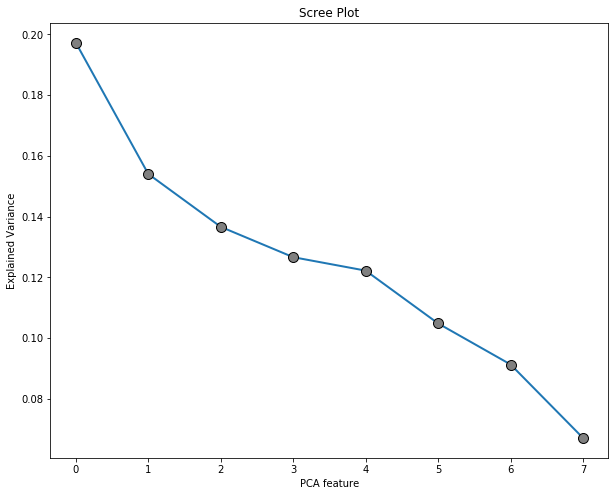

In [353]:
# calling the scree_plot function
scree_plot(pca_object = pca)

In [354]:
factors = pd.DataFrame(pd.np.transpose(pca.components_))

factors = factors.set_index(df_3_scaled.columns)

factors

,0,1,2,3,4,5,6,7
Extroversion,-0.055805,0.492691,0.249262,0.489543,0.260177,-0.602865,-0.122395,-0.078989
Agreeableness,0.334600,-0.181868,0.436925,-0.138466,-0.509182,-0.422745,0.454841,-0.005606
Conscientiousness,0.168842,-0.619624,-0.015888,-0.051103,0.569872,-0.269464,0.009915,-0.432703
Neuroticism,0.331493,0.295436,-0.560539,-0.146391,0.290150,-0.157291,0.549706,0.236838
Openness,0.108511,0.190010,0.640833,-0.366775,0.497964,0.273835,0.084290,0.277260
Professional Mindset,0.593878,-0.187077,-0.070999,0.095499,-0.024898,-0.126728,-0.553606,0.524396
Influence with skill,0.533488,0.412048,-0.020809,-0.211953,-0.115263,0.187153,-0.235085,-0.629820
Results through collaboration,0.312182,-0.109900,0.127941,0.727025,0.047198,0.484168,0.327133,-0.043229


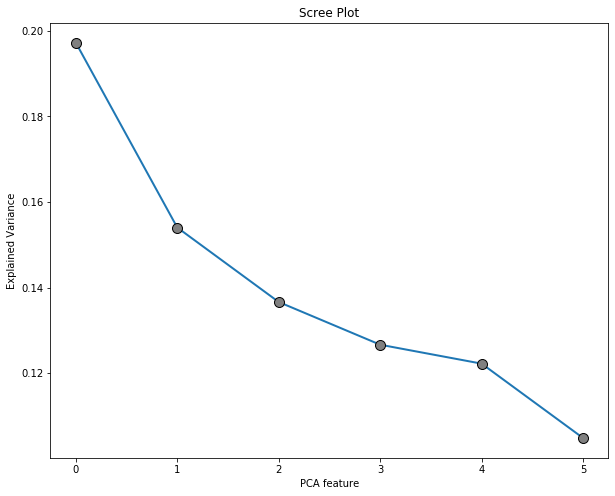

In [362]:
# Instantiating a new model to capture at least 80% of the variance
pca_80 = PCA(0.8,
            random_state = 802)

# FITTING and TRANSFORMING the purchases_scaled
pca_80_fit = pca_80.fit_transform(df_3_scaled)


# calling the scree_plot function
scree_plot(pca_object=pca_80)

In [363]:
factors_80 = pd.DataFrame(pd.np.transpose(pca_80.components_))

factors_80 = factors_80.set_index(df_3_scaled.columns)

factors_80

,0,1,2,3,4,5
Extroversion,-0.055805,0.492691,0.249262,0.489543,0.260177,-0.602865
Agreeableness,0.334600,-0.181868,0.436925,-0.138466,-0.509182,-0.422745
Conscientiousness,0.168842,-0.619624,-0.015888,-0.051103,0.569872,-0.269464
Neuroticism,0.331493,0.295436,-0.560539,-0.146391,0.290150,-0.157291
Openness,0.108511,0.190010,0.640833,-0.366775,0.497964,0.273835
Professional Mindset,0.593878,-0.187077,-0.070999,0.095499,-0.024898,-0.126728
Influence with skill,0.533488,0.412048,-0.020809,-0.211953,-0.115263,0.187153
Results through collaboration,0.312182,-0.109900,0.127941,0.727025,0.047198,0.484168


In [364]:
# analyzing factor strengths per client
X_pca_80 = pca_80.transform(df_3_scaled)

# converting to a DataFrame
X_pca_80_df = pd.DataFrame(X_pca_80)

# checking the results
X_pca_80_df


,0,1,2,3,4,5
0,3.008854,-1.159220,1.067704,0.552450,1.665566,-0.405828
1,3.297881,-1.327398,1.475636,-0.245900,1.479455,1.496469
2,2.113237,0.441006,-1.406154,0.350414,2.965794,-0.650421
3,3.854491,-0.013871,2.190982,-0.551281,-0.277487,0.586281
4,0.277788,-0.081258,0.719118,-0.353819,0.421310,-0.250839
5,1.022838,-1.437488,1.917127,-0.062642,-1.640259,0.966555
6,2.760913,-0.732281,2.119346,0.433875,-0.641083,0.960539
7,3.054494,1.920886,-1.637603,1.642603,-1.195688,1.269133
8,4.026664,0.529437,1.220808,1.036014,2.615139,-1.383081
9,2.398218,-1.184893,-0.056405,0.220582,0.810387,0.363050


In [365]:
# Clustering

pd.np.var(X_pca_80_df)

0    1.578051
1    1.232277
2    1.093016
3    1.013130
4    0.977701
5    0.838565
dtype: float64

In [366]:
# Intantiating a StandardScaler object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_80_df)


# TRANSFORMING our data after fit
X_scaled_2 = scaler.transform(X_pca_80_df)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled_2)


# reattaching column names
X_scaled_df.columns = X_pca_80_df.columns


# checking post-scaling variance
print(pd.np.var(X_scaled_df))

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
dtype: float64


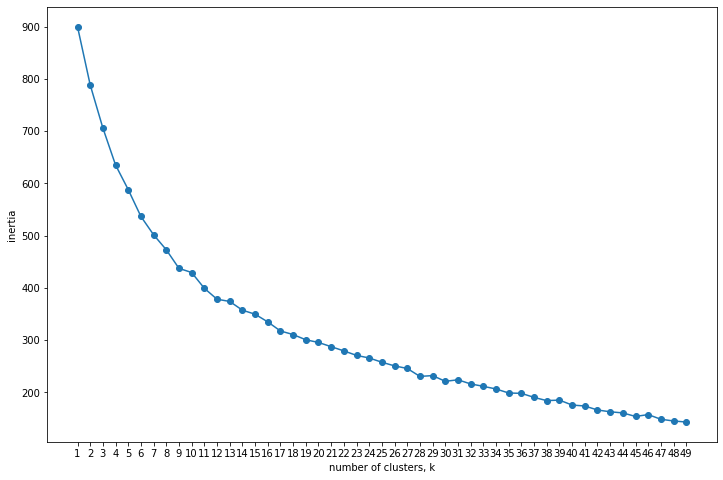

In [367]:
inertia_plot(data=X_scaled_df)

In [368]:
# INSTANTIATING a k-Means object
kmean = KMeans(n_clusters = 5,
             random_state = 222)


# fitting the object to the data
kmean.fit(X_scaled_df)


# converting the clusters to a DataFrame
kmean_df = pd.DataFrame({'Cluster': kmean.labels_})


# checking the results
print(kmean_df.iloc[: , 0].value_counts())

3    39
2    35
1    32
0    32
4    12
Name: Cluster, dtype: int64


In [369]:
# storing cluster centers
centroids_pca = kmean.cluster_centers_

# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

centroids_pca_df

,0,1,2,3,4,5
0,-0.401266,-0.891583,-0.258996,0.920033,-0.002558,0.389956
1,-0.070747,-0.148317,1.154249,-0.466844,-0.582101,0.133865
2,0.191658,1.100769,-0.359872,0.154265,-0.214707,0.611187
3,-0.137328,-0.104531,-0.490977,-0.597132,0.080427,-0.963296
4,1.146020,-0.097785,0.257959,0.282234,1.923934,-0.048776


In [371]:
# Creating column names

list_colum=[]

for i in range(1,7):
    list_colum.append(str('g' + str(i)))

In [372]:
# renaming principal components
centroids_pca_df.columns = list_colum


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,g1,g2,g3,g4,g5,g6
0,-0.40,-0.89,-0.26,0.92,-0.00,0.39
1,-0.07,-0.15,1.15,-0.47,-0.58,0.13
2,0.19,1.10,-0.36,0.15,-0.21,0.61
3,-0.14,-0.10,-0.49,-0.60,0.08,-0.96
4,1.15,-0.10,0.26,0.28,1.92,-0.05


In [375]:
# concatinating cluster memberships with principal components
df_4 = pd.concat([kmean_df, 
                  X_pca_80_df],
                 axis = 1)

# concatenating demographic information with pca-clusters
final_df = pd.concat([df.loc[ : , drop_list],
                                  df_4],
                                  axis = 1)
final_df

,surveyID,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,Cluster,0,1,2,3,4,5
0,a1000,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,4,3.008854,-1.159220,1.067704,0.552450,1.665566,-0.405828
1,a1001,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,4,3.297881,-1.327398,1.475636,-0.245900,1.479455,1.496469
2,a1002,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,4,2.113237,0.441006,-1.406154,0.350414,2.965794,-0.650421
3,a1003,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,1,3.854491,-0.013871,2.190982,-0.551281,-0.277487,0.586281
4,a1004,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,1,0.277788,-0.081258,0.719118,-0.353819,0.421310,-0.250839
5,a1005,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,1,1.022838,-1.437488,1.917127,-0.062642,-1.640259,0.966555
6,a1006,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,Dominican,Hispanic / Latino,1,2.760913,-0.732281,2.119346,0.433875,-0.641083,0.960539
7,a1007,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,Belgian,White / Caucasian,2,3.054494,1.920886,-1.637603,1.642603,-1.195688,1.269133
8,a1008,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,Swiss,White / Caucasian,4,4.026664,0.529437,1.220808,1.036014,2.615139,-1.383081
9,a1009,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,Japan,Far east Asian,4,2.398218,-1.184893,-0.056405,0.220582,0.810387,0.363050


In [376]:
# Creating column names

list_colum2=[]

for i in range(1,7):
    list_colum2.append(str('Group' + str(i)))

list_colum3=['id','brand','next brand', 'program','age', 'gender','nationality', 'ethnicity', 'cluster']

for i in list_colum2:
    list_colum3.append(i)

In [387]:
# renaming columns
final_df.columns = list_colum3

# checking the results
final_df.head(20)

,id,brand,next brand,program,age,gender,nationality,ethnicity,cluster,Group1,Group2,Group3,Group4,Group5,Group6
0,a1000,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,4,3.008854,-1.159220,1.067704,0.552450,1.665566,-0.405828
1,a1001,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,4,3.297881,-1.327398,1.475636,-0.245900,1.479455,1.496469
2,a1002,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,4,2.113237,0.441006,-1.406154,0.350414,2.965794,-0.650421
3,a1003,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,1,3.854491,-0.013871,2.190982,-0.551281,-0.277487,0.586281
4,a1004,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,1,0.277788,-0.081258,0.719118,-0.353819,0.421310,-0.250839
5,a1005,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,1,1.022838,-1.437488,1.917127,-0.062642,-1.640259,0.966555
6,a1006,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,Dominican,Hispanic / Latino,1,2.760913,-0.732281,2.119346,0.433875,-0.641083,0.960539
7,a1007,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,Belgian,White / Caucasian,2,3.054494,1.920886,-1.637603,1.642603,-1.195688,1.269133
8,a1008,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,Swiss,White / Caucasian,4,4.026664,0.529437,1.220808,1.036014,2.615139,-1.383081
9,a1009,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,Japan,Far east Asian,4,2.398218,-1.184893,-0.056405,0.220582,0.810387,0.363050


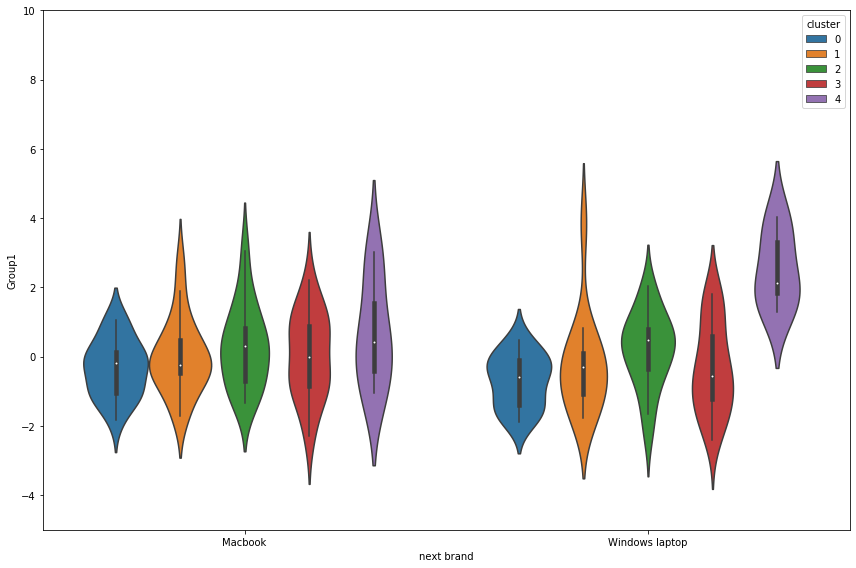

In [386]:
# Group 1

fig, ax = plt.subplots(figsize = (12, 8))
sns.violinplot(x = 'next brand',
            y = 'Group1',
            hue = 'cluster',
            data = final_df)

plt.ylim(-5, 10)
plt.tight_layout()
plt.show()

